In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K


# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension (for convolutional layers)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the autoencoder model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Save the model
autoencoder.save('/content/simple_autoencoder_model.h5')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 43s 89ms/step - loss: 0.2185 - val_loss: 0.1468
Epoch 2/10
469/469 [==============================] - 39s 83ms/step - loss: 0.1365 - val_loss: 0.1268
Epoch 3/10
469/469 [==============================] - 41s 87ms/step - loss: 0.1234 - val_loss: 0.1189
Epoch 4/10
469/469 [==============================] - 41s 87ms/step - loss: 0.1168 - val_loss: 0.1133
Epoch 5/10
469/469 [==============================] - 40s 86ms/step - loss: 0.1124 - val_loss: 0.1096
Epoch 6/10
469/469 [==============================] - 39s 84ms/step - loss: 0.1095 - val_loss: 0.1069
Epoch 7/10
469/469 [==============================] - 38s 82ms/step - loss: 0.1073 - val_loss: 0.1050
Epoch 8/10
469/469 [==============================] - 40s 86ms/step - loss: 0.1053 - val_loss: 0.1034
Epoch 9/10
469/469 [==============================] - 41s 86ms/step - loss: 0.1038 - val_loss: 0.1024
Epoch 10/10
469/4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Cell 1: Install required libraries
!pip install opencv-python numpy scikit-image tensorflow


In [ ]:
# Cell 2: Import necessary libraries
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
# Cell 3: Define the function to generate a small dataset of noisy images
def generate_noisy_images(num_images=100, image_size=(64, 64), noise_factor=0.5):
    noisy_images = []
    for _ in range(num_images):
        # Generate a random image
        image = np.random.random(image_size)

        # Add Gaussian noise
        noisy_image = image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image_size)

        # Clip values to [0, 1]
        noisy_image = np.clip(noisy_image, 0.0, 1.0)

        # Reshape for model compatibility
        noisy_image = noisy_image.reshape((*image_size, 1))

        noisy_images.append(noisy_image)

    return np.array(noisy_images)


In [ ]:
# Cell 4: Generate a small dataset of noisy images
num_images = 100
image_size = (64, 64)
noise_factor = 0.5

noisy_images = generate_noisy_images(num_images=num_images, image_size=image_size, noise_factor=noise_factor)


In [ ]:
# Cell 5: Define and train a simple Convolutional Autoencoder
input_shape = noisy_images[0].shape

# Encoder
encoder_input = layers.Input(shape=input_shape, name='img')
encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)

# Decoder
decoder_output = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(encoder_output)

# Autoencoder
simple_autoencoder = models.Model(encoder_input, decoder_output)
simple_autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
simple_autoencoder.fit(noisy_images, noisy_images, epochs=10, batch_size=32, shuffle=True, validation_split=0.2)


Epoch 1/10
3/3 [==============================] - 1s 142ms/step - loss: 0.1410 - val_loss: 0.1390
Epoch 2/10
3/3 [==============================] - 0s 110ms/step - loss: 0.1379 - val_loss: 0.1359
Epoch 3/10
3/3 [==============================] - 0s 108ms/step - loss: 0.1348 - val_loss: 0.1328
Epoch 4/10
3/3 [==============================] - 0s 130ms/step - loss: 0.1318 - val_loss: 0.1298
Epoch 5/10
3/3 [==============================] - 0s 102ms/step - loss: 0.1287 - val_loss: 0.1268
Epoch 6/10
3/3 [==============================] - 0s 115ms/step - loss: 0.1257 - val_loss: 0.1237
Epoch 7/10
3/3 [==============================] - 0s 75ms/step - loss: 0.1227 - val_loss: 0.1207
Epoch 8/10
3/3 [==============================] - 0s 81ms/step - loss: 0.1196 - val_loss: 0.1175
Epoch 9/10
3/3 [==============================] - 0s 69ms/step - loss: 0.1165 - val_loss: 0.1143
Epoch 10/10
3/3 [==============================] - 0s 74ms/step - loss: 0.1132 - val_loss: 0.1110


In [ ]:
# Cell 6: Load the trained Simple Convolutional Autoencoder model
simple_autoencoder = models.load_model('/content/simple_autoencoder_model.h5')


In [ ]:
# Cell 7: Upload an image from your local machine to Colab
uploaded = files.upload()

# Assuming you uploaded an image named 'input_image.jpg'
input_image_path = list(uploaded.keys())[0]
input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
input_image = cv2.resize(input_image, (64, 64))  # Resize to match the model input size

# Normalize the image to [0, 1]
input_image = input_image / 255.0

# Reshape the image for model compatibility
input_image = input_image.reshape((1, 64, 64, 1))


NameError: ignored

1/1 [==============================] - 0s 156ms/step


<ipython-input-26-e3af73cee22a>:14: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = peak_signal_noise_ratio(resized_input_image[..., 0], denoised_output[0, :, :, 0])
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


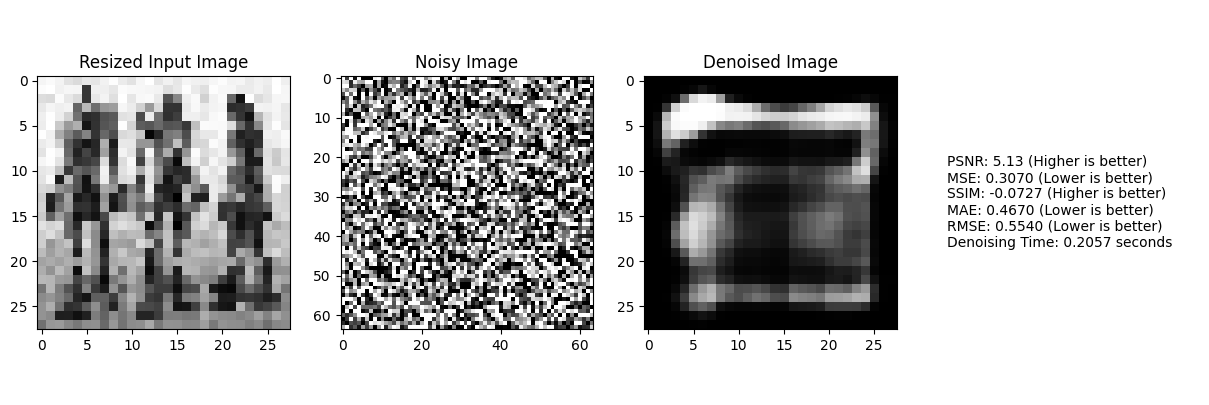

In [ ]:
# Cell 8: Get the denoised output from the Simple Convolutional Autoencoder and evaluate metrics
import time

# Resize the input image to match the expected input shape of the model
resized_input_image = cv2.resize(input_image[0, :, :, 0], (28, 28))
resized_input_image = np.expand_dims(resized_input_image, axis=-1)  # Add channel dimension

# Assuming 'noisy_images' is already defined
start_time = time.time()
denoised_output = simple_autoencoder.predict(resized_input_image[np.newaxis, ...])
denoising_time = time.time() - start_time

# Calculate evaluation metrics
psnr_value = peak_signal_noise_ratio(resized_input_image[..., 0], denoised_output[0, :, :, 0])
mse_value = mean_squared_error(resized_input_image[..., 0], denoised_output[0, :, :, 0])
ssim_value = structural_similarity(resized_input_image[..., 0], denoised_output[0, :, :, 0])

mae_value = mean_absolute_error(resized_input_image[..., 0], denoised_output[0, :, :, 0])
rmse_value = np.sqrt(mse_value)

# Display the images and metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(resized_input_image[..., 0], cmap='gray')
plt.title('Resized Input Image')

plt.subplot(1, 4, 2)
plt.imshow(noisy_images[0, :, :, 0], cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 4, 3)
plt.imshow(denoised_output[0, :, :, 0], cmap='gray')
plt.title('Denoised Image')

plt.subplot(1, 4, 4)
# Display metrics and whether higher or lower is better
metrics_text = f'PSNR: {psnr_value:.2f} (Higher is better)\nMSE: {mse_value:.4f} (Lower is better)\nSSIM: {ssim_value:.4f} (Higher is better)\nMAE: {mae_value:.4f} (Lower is better)\nRMSE: {rmse_value:.4f} (Lower is better)\nDenoising Time: {denoising_time:.4f} seconds'
plt.text(0, 0.5, metrics_text, fontsize=10, ha='left', va='center')
plt.axis('off')

plt.show()
